# Machine Learning - Practical 2 - Introduction to Pytorch and Linear Regression with Pytorch
Author: Bilal Kachir, Jakob Demmer, Mohammadreza Radnezhad |
Summer Term 2025   

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 2-3. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Machine learning 1` -> `Files` -> `Submission of Homework 1`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as "DO NOT CHANGE", similarly write your solution to the marked cells.

## How to work on the exercise?

Generally, for machine learning you often need access to a machine with a GPU. This is not strictly required for this homework but we recommend using [Kaggle](https://www.kaggle.com/), which offers convenient access to a GPU and has all the dependencies that we need preinstalled ([here](https://gist.github.com/anwai98/444d3ff11c1365f2c610579d5df0830b) are some initial steps to work with Kaggle Notebooks). You can load this notebook on kaggle via `File` -> `Import Noteboook` -> `Browse and  Import`. Alternatively, you can also use [Colab](https://colab.research.google.com).

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a linear regression model with PyTorch and perform training and prediction the linear regression problem from the previous practical. The goal of this tutorial is to understand the PyTorch framework and getting to know to use it.

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) (data visualization library on top of matplotlib)


In [1]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler

In [2]:
torch.set_default_dtype(torch.float64)

## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [3]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()

(True, True, 1)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

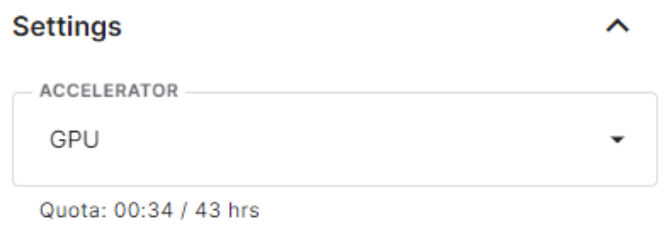

Now check the availability again (after re-running the imports)

In [4]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

(True, True, 1, 0)

Choose your device for computation. CPU or one of your CUDA devices?

In [5]:
# DO NOT CHANGE
#use_cuda = True
use_cuda = True
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cuda:0


# PyTorch: Getting to know Tensors

*feel free to skip this before 'Machine Learning with Pytorch' section if you feel confident enough*   
PyTorch is a library for machine learning on arbitrary datasets, including irregular input data such as graphs, point clouds and manifolds.

In this short tutorial we will explore some of its features to handle data in tensors.
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [6]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)

Let us find out what the properties of this tensor 'a' are.

In [7]:
# TODO print the tensor
print(a)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [8]:
# TODO print its type
type(a)

torch.Tensor

In [9]:
# TODO print its shape
a.shape

torch.Size([2, 5])

In [10]:
# TODO print its size
a.size()

torch.Size([2, 5])

In [11]:
# TODO create a new numpy array out of the tensor and print its size
new_numpyarray = a.numpy()
print(new_numpyarray.shape)

(2, 5)


Let's create some new tensors.

In [12]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it
ones = torch.ones(2, 5, dtype=torch.int)
# some dtypes: torch.float32, torch.int, torch.bool
print(ones)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int32)


In [13]:
# TODO create a tensor of shape (3,4) filled with zeros and print it
zeros = torch.zeros(3, 4, dtype=torch.int)
print(zeros)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)


In [14]:
# TODO transpose the tensor 'a'
a_t = a.T
print(a_t)

tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


Now change a value in the numpy array. Does the corresponding tensor change?

In [15]:
# TODO change value in numpy array and inspect the tensor a
numpyarray[1,3]=1000
print(numpyarray)

print(a)

# Tensor a is changed - they share the same memory

[[   0    1    2    3    4]
 [   5    6    7 1000    9]]
tensor([[   0,    1,    2,    3,    4],
        [   5,    6,    7, 1000,    9]])


**Does it work the other way round as well?**



In [16]:
a[0, 2] = 4242

print(a)

print(numpyarray)
# It does work the other way around as well!

tensor([[   0,    1, 4242,    3,    4],
        [   5,    6,    7, 1000,    9]])
[[   0    1 4242    3    4]
 [   5    6    7 1000    9]]


Now we want to make use of the different devices available, namely cpu and gpu.

In [17]:
# TODO move 'a' to the gpu
a_gpu = a.to(device)
print(a)
print(a_gpu)

tensor([[   0,    1, 4242,    3,    4],
        [   5,    6,    7, 1000,    9]])
tensor([[   0,    1, 4242,    3,    4],
        [   5,    6,    7, 1000,    9]], device='cuda:0')


**If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?**

In [18]:
a_gpu[0, 0] = 999
print(a_gpu)
print(a)

tensor([[ 999,    1, 4242,    3,    4],
        [   5,    6,    7, 1000,    9]], device='cuda:0')
tensor([[   0,    1, 4242,    3,    4],
        [   5,    6,    7, 1000,    9]])


# Machine Learning with Pytorch

The process of training and evaluating a machine learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images. As Pytorch does not have in-build preprocessing for data panels we have to define our custom normalization inside a Dataset or Dataloader.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook using linear regression as an example.


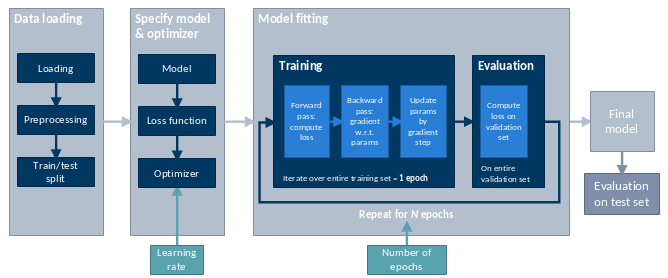

## Data Loading and Preprocessing

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data.

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results.  

Usually, train and test datasets are already split in the provided kaggle datasets but as we work with a custom dataset, we would have to make train-test split ourselves first.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
test_size = 0.2
target_clm='critical_temp'

In [21]:
# TODO: load data - same as in the previous practical and make train_test_split from sklearn
data = pd.read_csv('superconduct_train.csv')
print(data.shape)
# 82 features
# 21263 samples/materials

#?train_test_split - shuffle is default true
train, test = train_test_split(
    data,
    test_size=test_size,
    random_state=1
)

print(train.shape)
print(test.shape)
len(train)
print(data.head)

(21263, 82)
(17010, 82)
(4253, 82)
<bound method NDFrame.head of        number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
21258                   4        106.957877             53.095769   
21259                   5         92.266740             49.021367   
21260                   2         99.663190             95.609104   
21261                   2         99.663190             97.095602   
21262                   3         87.468333             86.858500   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592          

### Dataset

PyTorch has 2 entities to load data. They are **Dataset** and **Dataloader**.
**Dataset** is a class, which defines your data and often applies data preprocessing transformations, like normalization. It should have at least 3 functions :
* __init__ - as any other init. Usually, you would provide path to dataset here or dataset elements.
* __len__ - should return the whole dataset size
* __getitem__ - this function returns 1 pair of data and label, also here preprocessing transformations are usually applied



For the next exercise, take a look here for an example https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

In [22]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        TODO: save params to self attributes,
        x is data without target column
        y is target column
        transform df to_numpy
        '''
        self.x = df.drop(columns=[target_clm]).to_numpy()
        self.y = df[target_clm].to_numpy()
        self.mean = mean
        self.std = std
        self.normalise = normalise

    def __len__(self):
        # TODO: return whole dataset length
        return len(self.x)

    def __getitem__(self, index):
        data = self.x[index]
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std
        return data.squeeze(0), self.y[index]

In [23]:
tmp_dataset = Dataset(train, target_clm, normalise=False)

tmp_dataset

In [24]:
print(len(tmp_dataset)) # len is overloaded

17010


In [25]:
# TODO calculate the mean and standard deviation of the train dataset
x_train = tmp_dataset.x

# Get mean and std
# applied along axis=0 for one value per feature
train_mean = np.mean(x_train, axis=0, keepdims=True).astype(np.float32)  # shape (1, n_features)
train_std  = np.std (x_train, axis=0, keepdims=True).astype(np.float32)  # shape (1, n_features)
print(train_mean)
print(train_std)

[[4.1105232e+00 8.7724037e+01 7.3181671e+01 7.1474129e+01 5.8766075e+01
  1.1642413e+00 1.0628206e+00 1.1542493e+02 3.3255341e+01 4.4345016e+01
  4.1370392e+01 7.6947925e+02 8.7011322e+02 7.3741656e+02 8.3257141e+02
  1.2975931e+00 9.2563736e-01 5.7117029e+02 4.8287363e+02 2.1527477e+02
  2.2354169e+02 1.5804659e+02 1.3475555e+02 1.4453317e+02 1.2107142e+02
  1.2662253e+00 1.1298380e+00 1.3911023e+02 5.1276169e+01 5.1536346e+01
  5.2220318e+01 6.1223091e+03 5.2812417e+03 3.4779504e+03 3.1371555e+03
  1.0716326e+00 8.5538995e-01 8.6500615e+03 2.9032063e+03 3.4122988e+03
  3.3133418e+03 7.6824692e+01 9.2683762e+01 5.4332336e+01 7.2408707e+01
  1.0686309e+00 7.6947671e-01 1.2056526e+02 5.9331135e+01 4.8858936e+01
  4.4372414e+01 1.4324192e+01 1.3887441e+01 1.0165018e+01 1.0186920e+01
  1.0922872e+00 9.1305894e-01 2.1141376e+01 8.2431259e+00 8.3308411e+00
  7.7101355e+00 8.9744934e+01 8.1729156e+01 2.9949610e+01 2.7445740e+01
  7.2677886e-01 5.3857815e-01 2.5061096e+02 6.2120014e+01 9.8820

In [26]:
# TODO define new datasets with mean, std and normalise=True
conductor_train = Dataset(train, target_clm, mean=train_mean, std=train_std, normalise=True)
conductor_test = Dataset(test, target_clm, mean=train_mean, std=train_std, normalise=True)

We need to **split** the train dataset in two sets, one for training and one for validation.
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure that train and test splits are same across different model runs.

In fact, the good practice is to fix a global random seed not only the generator seed for even better reproducibility with `torch.manual_seed(0)`.
Machine learning models often involve random initialization of weights, augmentations, dropout layers, and other stochastic processes. Without fixing the random seed, each run of the model may produce slightly different results, making it challenging to reproduce specific results or debug issues.

In [27]:
val_size = 0.1
torch.manual_seed(0)

# TODO split the train dataset in conductor_train and conductor_val
conductor_train, conductor_val = train_test_split(
    conductor_train,
    test_size=val_size,
    random_state=1
)

In [28]:
batch_size = 256

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
**Dataloader** calls \_\_getitem__ function from the Dataset and forms the batches.


Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [29]:
# TODO create dataloader for training, validation and test
train_dataloader = DataLoader(
    conductor_train,
    batch_size=batch_size,
    shuffle=True
)
val_dataloader = DataLoader(
    conductor_val,
    batch_size=batch_size,
    shuffle=True
)
test_dataloader = DataLoader(
    conductor_test,
    batch_size=batch_size,
    shuffle=True
)
#?DataLoader

Let's get a data point now to see what we're dealing with.

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [30]:
# TODO get an element of the train_dataloader
x_batch, y_batch = next(iter(train_dataloader))

print(x_batch)
print(y_batch)

tensor([[ 0.6163,  0.1019, -0.4385,  ..., -0.4741, -0.7191, -0.8472],
        [-0.0766,  0.1500,  0.5111,  ..., -0.9311, -0.8363, -0.7094],
        [-1.4624,  0.2243,  0.6194,  ..., -0.9019, -0.6983, -0.4026],
        ...,
        [ 0.6163, -0.8876, -0.0408,  ..., -0.2662,  1.1845,  1.0790],
        [-0.0766, -0.8487, -0.3018,  ..., -0.6772,  0.9473,  1.1538],
        [ 0.6163, -0.1615, -0.4526,  ..., -0.3505, -0.9043, -0.5046]])
tensor([ 82.0000,  90.0000,   0.6000,  25.0000,  86.5000,   7.1500,  17.8000,
         14.0000,  32.4000,  26.5000,  90.4000,  58.0000,   5.6000, 114.0000,
          6.0000,   6.0000,  11.0000,   3.4200,   3.9300, 105.1000,  92.1000,
        125.5000, 132.9000,   2.8900,  82.4000,   7.2000,  84.0000,   9.2000,
         14.0000,  20.3000,  91.8000,  37.6000,  36.3000,  65.0000,  54.5000,
         77.0000, 105.0000,  95.3000,  20.3000,  52.0000,   6.0000,  28.9000,
         30.1500,  19.5000,  14.8000,  74.6000,   2.1200,   1.4000,  95.8500,
          6.5000,  3

In [31]:
# TODO print the dimensions of for elements from the previous step
# Typo alert
print("Batch x:", x_batch.shape)
print("Batch y:", y_batch.shape)

Batch x: torch.Size([256, 81])
Batch y: torch.Size([256])


x has size (\[batchsize\], 81) --> 256 elements/batches (or whatever you have defined in your data loader), 81 feature values.

y has size (\[batchsize\], 1) --> 256 elements/batches (again depends on your data loader config). There's one target value for each set of the features.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training input row.

Before, we set some variables:
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and
- the learning rate.


In [32]:
epochs = 1
input_dim = 81
output_dim = 1
lr = 0.001

In [33]:
class LinearRegression(torch.nn.Module):
    """
    Linear regression model inherits the torch.nn.Module
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LinearRegression, self).__init__()
        # TODO define linear layer for the model
        self.linear = torch.nn.Linear(input_dim, output_dim)


    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.reshape(-1, 81)
        # TODO run the data through the layer
        outputs = self.linear(x)
        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [34]:
# TODO instantiate the model
model = LinearRegression(input_dim, output_dim)

Feed the model to the GPU if available.

In [35]:
# TODO move model to device you specified above
model = model.to(device)

Put the model in training mode.

In [36]:
# TODO put the model in train mode
model.train()

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

### Define a Loss Function

Since we're dealing with regression problem, [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is the canonical choice for the loss.

In [37]:
# TODO define the loss function
loss_function = torch.nn.MSELoss()
print(loss_function)

MSELoss()


## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the elements of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

### First, let's do all of the steps manually, without using the optimizer

**Hints:**
* define number of epochs to see the dynamic. You need to see the effect over several epochs but it should no be too long.
* use learning rate defined above as `lr`
* when doing parameters update - do it under `with torch.no_grad():`. This would disable the gradient computation for the operations under it. And we don't need gradients for updating the weights step.
* you need to update the model parameters. See [here](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html) for more details on how to access them
* don't forget to track the learning (loss)

In [38]:
# TODO do a simple for-loop to illustrate how the gradient update if done over batches.
# Print loss values across epochs to compare with the PyTorch optimizers later
epochs = 5
manual_losses = []
for epoch in range(1, epochs+1):
    total_loss = 0.0
    for x, y in train_dataloader:
        # move batch to device
        x, y = x.to(device), y.to(device)

        # zero gradients for new batch
        model.zero_grad()

        # forward pass with shape [batch_size,]
        preds = model(x).squeeze()

        # compute loss by mean over batch
        loss = loss_function(preds, y)

        # backpropagation
        loss.backward()

        # manual SGD optimizer
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad

        # get total loss as sum of batch losses, to compute average later
        total_loss += loss.item() * x.size(0)

    # avrg loss over all samples
    avg_loss = total_loss / len(train_dataloader.dataset)
    manual_losses.append(avg_loss)
    print(f"Epoch {epoch} — Training Loss: {avg_loss:.2f}")


Epoch 1 — Training Loss: 1705.17
Epoch 2 — Training Loss: 1343.06
Epoch 3 — Training Loss: 1138.75
Epoch 4 — Training Loss: 984.28
Epoch 5 — Training Loss: 864.05


This was equivalent to SGD optimizer

### Now let's do it in the pytorch style using the optimizer  

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).
Redefine the model and initialize SGD optimizer

In [ ]:
# TODO Redefine the model and initialize SGD optimizer, write a train loop as above and compare the loss values

sgd_model = LinearRegression(input_dim, output_dim)
sgd_model = sgd_model.to(device)
sgd_model.train()

optimizer = torch.optim.SGD(sgd_model.parameters(), lr=lr)

sgd_losses = []
for epoch in range(1, epochs+1):
    total_loss = 0.0
    for x, y in train_dataloader:
        # move batch to device
        x, y = x.to(device), y.to(device)

        # zero gradients for new batch
        optimizer.zero_grad()

        # forward pass to sgd_model with shape [batch_size,]
        preds = sgd_model(x).squeeze()

        # compute loss by mean over batch
        loss = loss_function(preds, y)

        # backpropagation
        loss.backward()

        # sgd optimizer step
        optimizer.step()

        # get total loss as sum of batch losses, to compute average later
        total_loss += loss.item() * x.size(0)

    avg_loss = total_loss / len(train_dataloader.dataset)
    sgd_losses.append(avg_loss)
    print(f"[SGD Optim] Epoch {epoch:2d} — Loss: {avg_loss:.4f}")



[SGD Optim] Epoch  1 — Loss: 1703.8031
[SGD Optim] Epoch  2 — Loss: 1337.7181
[SGD Optim] Epoch  3 — Loss: 1134.0379
[SGD Optim] Epoch  4 — Loss: 980.7023
[SGD Optim] Epoch  5 — Loss: 861.0516


### COmparison Manual vs. Automatic SGD

In [ ]:
print("| Epoch | Manual Loss |  SGD Loss   |")
print("|-------|------------|------------|")
for i, (m, s) in enumerate(zip(manual_losses, sgd_losses), start=1):
    print(f"| {i:5d} | {m:10.4f} | {s:10.4f} |")


| Epoch | Manual Loss |  SGD Loss   |
|-------|------------|------------|
|     1 |  1705.1715 |  1703.8031 |
|     2 |  1343.0607 |  1337.7181 |
|     3 |  1138.7502 |  1134.0379 |
|     4 |   984.2803 |   980.7023 |
|     5 |   864.0459 |   861.0516 |


### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen data row from the test dataset.

Run this cell several times, does the model predict accurately?

Set the number of epochs to 15 during training and try again!

**TODO your answer here** -

In [ ]:
# TODO get a random element of the test dataloader
x_batch, y_batch = next(iter(test_dataloader))
x_batch, y_batch = x_batch.to(device), y_batch.to(device)

# TODO make a prediction
with torch.no_grad():
    preds = sgd_model(x_batch).squeeze()

# TODO print predicted label and given label
print(f"Predicted: {preds[0]:.2f}")
print(f"Given label: {y[0]:.2f}")

Predicted: -12.42
Given label: 81.50


In [ ]:
sgd_model = LinearRegression(input_dim, output_dim)
sgd_model = sgd_model.to(device)
sgd_model.train()

optimizer = torch.optim.SGD(sgd_model.parameters(), lr=lr)

sgd_losses = []

epochs = 15

for epoch in range(1, epochs+1):
    total_loss = 0.0
    for x, y in train_dataloader:
        # move batch to device
        x, y = x.to(device), y.to(device)

        # zero gradients for new batch
        optimizer.zero_grad()

        # forward pass to sgd_model with shape [batch_size,]
        preds = sgd_model(x).squeeze()

        # compute loss by mean over batch
        loss = loss_function(preds, y)

        # backpropagation
        loss.backward()

        # sgd optimizer step
        optimizer.step()

        # get total loss as sum of batch losses, to compute average later
        total_loss += loss.item() * x.size(0)

    avg_loss = total_loss / len(train_dataloader.dataset)
    sgd_losses.append(avg_loss)
    print(f"[SGD Optim] Epoch {epoch:2d} — Loss: {avg_loss:.4f}")

# TODO get a random element of the test dataloader
x_batch, y_batch = next(iter(test_dataloader))
x_batch, y_batch = x_batch.to(device), y_batch.to(device)

# TODO make a prediction
with torch.no_grad():
    preds = sgd_model(x_batch).squeeze()

# TODO print predicted label and given label
print(f"Predicted: {preds[0]:.2f}")
print(f"Given label: {y[0]:.2f}")


[SGD Optim] Epoch  1 — Loss: 1711.4736
[SGD Optim] Epoch  2 — Loss: 1339.5188
[SGD Optim] Epoch  3 — Loss: 1135.2152
[SGD Optim] Epoch  4 — Loss: 980.9720
[SGD Optim] Epoch  5 — Loss: 861.1948
[SGD Optim] Epoch  6 — Loss: 767.3862
[SGD Optim] Epoch  7 — Loss: 693.2335
[SGD Optim] Epoch  8 — Loss: 634.4379
[SGD Optim] Epoch  9 — Loss: 587.7323
[SGD Optim] Epoch 10 — Loss: 550.4557
[SGD Optim] Epoch 11 — Loss: 520.4878
[SGD Optim] Epoch 12 — Loss: 496.5134
[SGD Optim] Epoch 13 — Loss: 477.2045
[SGD Optim] Epoch 14 — Loss: 461.4577
[SGD Optim] Epoch 15 — Loss: 448.6643
Predicted: -8.05
Given label: 17.00


### Track and Plot the Training and Validation error

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.

The plot should look similar to this:


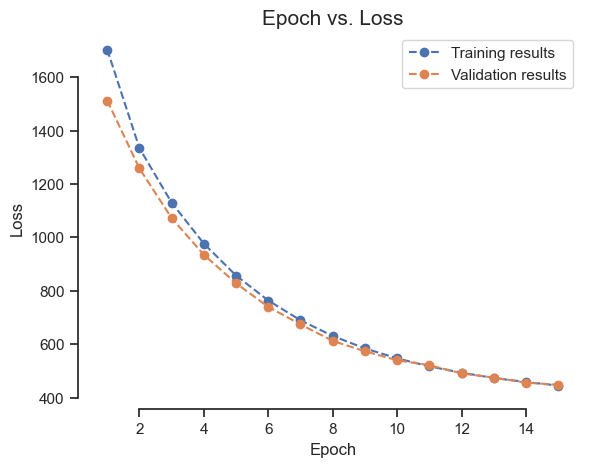


**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [39]:
# TODO refine the training function from above
# it should contain:
# - saving of losses
# - returning the mean loss

def train_sgd(model, train_dataloader, loss_fn, optimizer, device, epochs):
    model = model.to(device)
    model.train()

    epoch_losses = []
    n_samples = len(train_dataloader.dataset)

    for epoch in range(1, epochs+1):
        total_loss = 0.0

        for x, y in train_dataloader:
          # move batch to device
          x, y = x.to(device), y.to(device)

          # zero gradients for new batch
          optimizer.zero_grad()

          # forward pass to sgd_model with shape [batch_size,]
          preds = model(x).squeeze()

          # compute loss by mean over batch
          loss = loss_fn(preds, y)

          # backpropagation
          loss.backward()

          # sgd optimizer step
          optimizer.step()

          # get total loss as sum of batch losses, to compute average later
          total_loss += loss.item() * x.size(0)

        # average over all samples
        avg_loss = total_loss / n_samples
        epoch_losses.append(avg_loss)
        #print(f"[SGD Optim] Epoch {epoch:2d} — Loss: {avg_loss:.4f}")

    mean_loss = sum(epoch_losses) / len(epoch_losses)
    return mean_loss

test_model = LinearRegression(input_dim, output_dim)

test_optimizer = torch.optim.SGD(test_model.parameters(), lr=lr)

# Example call with previous args
mean_loss = train_sgd(test_model, train_dataloader, loss_function, test_optimizer, device, 15)
print("Mean_loss: ", mean_loss)

Mean_loss:  776.9803735788095


In [40]:
# TODO write a validation function that calculates the loss on the validation set
# you can also combine it with the training function
def validate_sgd(model, val_dataloader, loss_fn, device):
    model = model.to(device)
    model.eval()
    total_loss = 0.0
    n_samples = len(val_dataloader.dataset)
    with torch.no_grad():
        for x, y in val_dataloader:
            x, y = x.to(device), y.to(device)
            preds = model(x).squeeze()
            loss = loss_fn(preds, y)
            total_loss += loss.item() * x.size(0) # multiply for batch size
    mean_loss = total_loss / n_samples
    return mean_loss

# Example call after training test_model
val_loss = validate_sgd(test_model, val_dataloader, loss_function, device)
print("Mean validation Loss:", val_loss)


Mean validation Loss: 449.3147554187084


In [41]:
# TODO write a run_training function that
# - calls the train and validate functions for each epoch
# - saves the train_losses, val_losses as arrays for each epoch

def run_training(model, train_dataloader, val_dataloader, loss_fn, optimizer, device, epochs):
    train_losses = []
    val_losses = []
    for epoch in range(1, epochs+1):
        train_loss = train_sgd(model, train_dataloader, loss_fn, optimizer, device, 1)
        val_loss = validate_sgd(model, val_dataloader, loss_fn, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"[SGD Optim] Epoch {epoch:2d} — Train Loss: {train_loss:.4f} — Val : {val_loss:.4f}")
    return train_losses, val_losses


In [ ]:
# TODO call the run_training function and run it for 10 epochs.

test_model = LinearRegression(input_dim, output_dim)

test_optimizer = torch.optim.SGD(test_model.parameters(), lr=lr)

num_epochs = 10
train_losses, val_losses = run_training(test_model, train_dataloader, val_dataloader, loss_function, test_optimizer, device, num_epochs)

[SGD Optim] Epoch  1 — Train Loss: 1700.7229 — Val : 1512.1138
[SGD Optim] Epoch  2 — Train Loss: 1337.2455 — Val : 1259.7578
[SGD Optim] Epoch  3 — Train Loss: 1133.5367 — Val : 1077.3071
[SGD Optim] Epoch  4 — Train Loss: 980.0313 — Val : 937.1103
[SGD Optim] Epoch  5 — Train Loss: 860.6890 — Val : 828.3757
[SGD Optim] Epoch  6 — Train Loss: 766.9105 — Val : 742.2167
[SGD Optim] Epoch  7 — Train Loss: 692.7624 — Val : 674.5959
[SGD Optim] Epoch  8 — Train Loss: 634.0652 — Val : 620.9815
[SGD Optim] Epoch  9 — Train Loss: 587.3926 — Val : 578.0634
[SGD Optim] Epoch 10 — Train Loss: 550.1715 — Val : 543.7525


In [42]:
# TODO write a plot function
def plot_losses(train_losses, val_losses, lr=None, batch_size=None):
    # Prepare DataFrame for seaborn
    epochs = list(range(1, len(train_losses) + 1))
    df = pd.DataFrame({
        'epoch': epochs,
        'Training Results': train_losses,
        'Validation Results': val_losses
    })
    df_melt = df.melt(id_vars='epoch', var_name='Set', value_name='Loss')

    # set seaborn style
    sns.set(style='whitegrid')

    # plot
    plt.figure()
    sns.lineplot(data=df_melt, x='epoch', y='Loss', hue='Set', marker='o')
    # only show the lr if its not None
    title = "Epoch vs. Loss"
    if lr is not None:
        title += f" (lr={lr})"
    if batch_size is not None:
        title += f" (batch_size={batch_size})"
    plt.title(title)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.show()


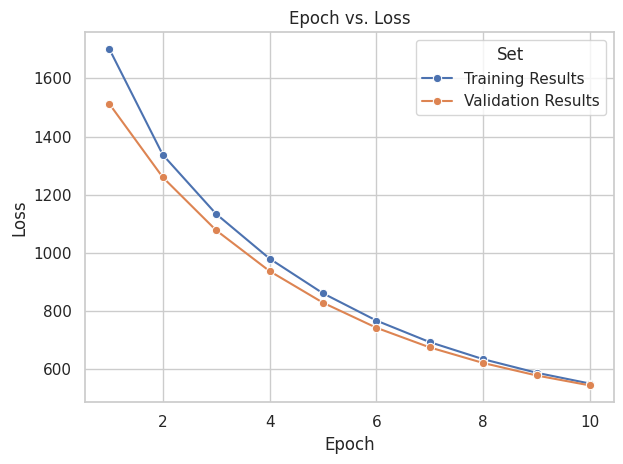

In [ ]:
# TODO plot losses
plot_losses(train_losses, val_losses)


Comment on the loss curve. Does it look as expected? Why/Why not?
If not, what might be the reason.

### Answer Loss curve
The mean loss and the validation loss are converging and reaching approximatley a plateau after 15 epochs which is expected. The validation loss is lower than training loss which is usually not expected. Since we have not seen the validation set we should probably have more loss on this set, but this is not the case here. We are updating the weights after each batch in the training set, and we are averaging the losses from all of those batches in each epoch. As for the validation loss we calculate the loss on the final model after updating the parameters in the trainig set in each epch. That is why we got the higher losses in early epochs and also higher differences between the validation and the training loss. As the model progress the validation loss and training loss converge together. In last few epochs, the mean training loss is roughly equal to the validation loss. This is because the model parametrs are stabilizing in last few epoches and the differences between individual batch losses become smaller, and averaging them results in a smoother training loss. This can make the mean training loss roughly equal to the validation loss, even though the validation loss is computed using the model parameters optimized across all batches.

# Hyperparameters influence

Now, once we successfully reproduced linear regression using PyTorch, lets explore the hyperparameters influence, such as learning rate or batch size.

Train several models with 30 train epochs and using different learning rates - [0.0001, 0.001, 0.01, 0.1, 1, 10].
What do you notice? Why?

*Hints*:
* Do not forget to reinitialize models and update the optimizers
* Use different colors and line styles to display different learning rates and train-validation splits

In [ ]:
## TODO - train models with different learning rates

lr = [0.0001, 0.001, 0.01, 0.1, 1, 10]
num_epochs = 30

lr_losses = {}

for lr_rate in lr:
    model     = LinearRegression(input_dim, output_dim)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr_rate)

    train_losses, val_losses = run_training(
        model,
        train_dataloader,
        val_dataloader,
        loss_function,
        optimizer,
        device,
        num_epochs
    )

    # store under the lr key
    lr_losses[lr_rate] = {
        'train_losses': train_losses,
        'val_losses':   val_losses
    }


[SGD Optim] Epoch  1 — Train Loss: 2204.0769 — Val : 2157.5536
[SGD Optim] Epoch  2 — Train Loss: 1953.2213 — Val : 1963.1675
[SGD Optim] Epoch  3 — Train Loss: 1813.2615 — Val : 1846.1116
[SGD Optim] Epoch  4 — Train Loss: 1726.4853 — Val : 1768.3747
[SGD Optim] Epoch  5 — Train Loss: 1666.1758 — Val : 1710.3331
[SGD Optim] Epoch  6 — Train Loss: 1619.0481 — Val : 1663.1024
[SGD Optim] Epoch  7 — Train Loss: 1579.3512 — Val : 1622.3535
[SGD Optim] Epoch  8 — Train Loss: 1543.9395 — Val : 1585.4003
[SGD Optim] Epoch  9 — Train Loss: 1511.3086 — Val : 1551.3118
[SGD Optim] Epoch 10 — Train Loss: 1480.7033 — Val : 1519.2673
[SGD Optim] Epoch 11 — Train Loss: 1451.6686 — Val : 1488.8341
[SGD Optim] Epoch 12 — Train Loss: 1423.9615 — Val : 1459.8334
[SGD Optim] Epoch 13 — Train Loss: 1397.4239 — Val : 1432.0842
[SGD Optim] Epoch 14 — Train Loss: 1371.9375 — Val : 1405.4618
[SGD Optim] Epoch 15 — Train Loss: 1347.3853 — Val : 1379.8430
[SGD Optim] Epoch 16 — Train Loss: 1323.7100 — Val : 13

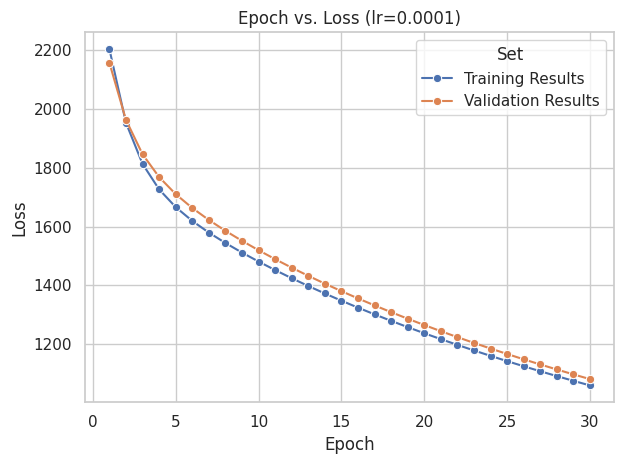

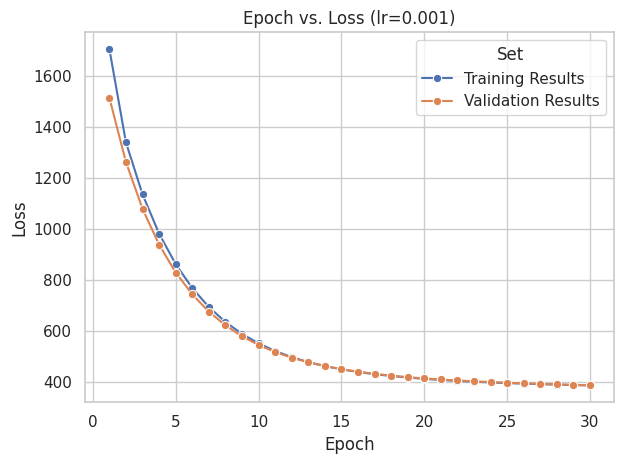

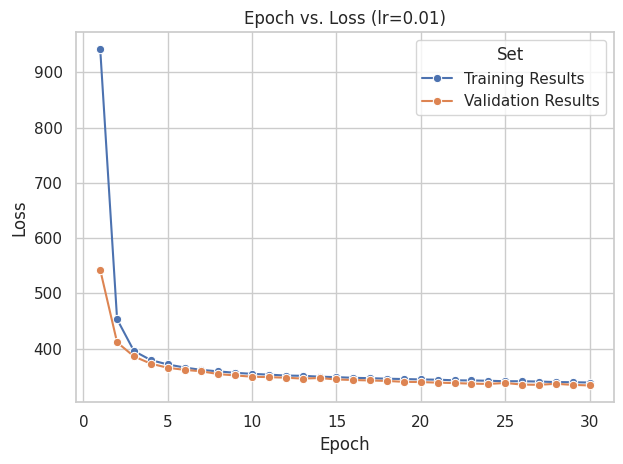

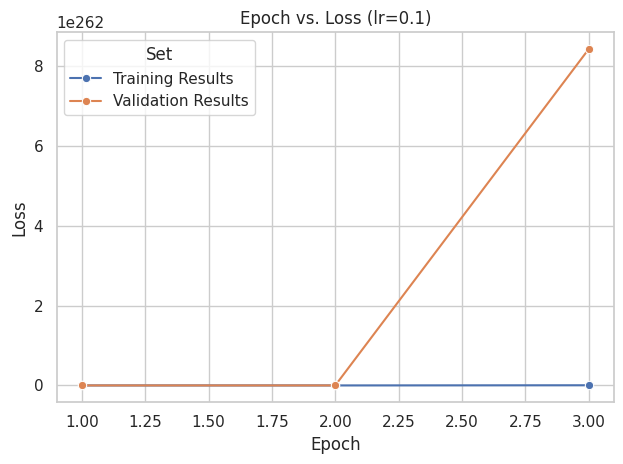

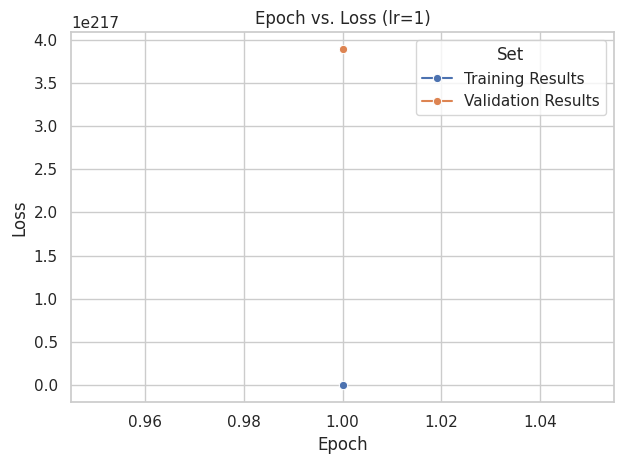

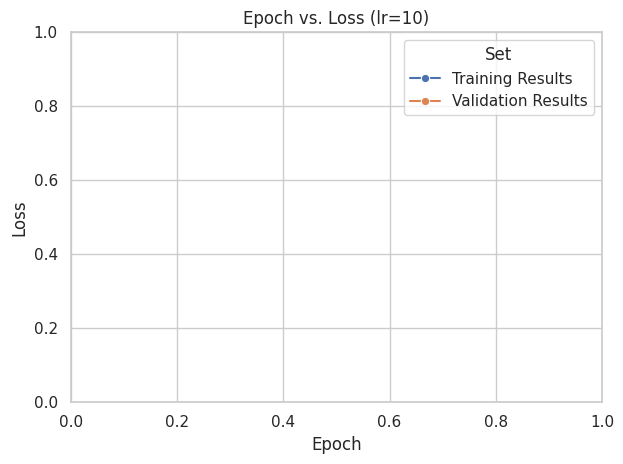

In [ ]:
## TODO plot the losses from different models. What do you see and why?
for lr_rate, curves in lr_losses.items():
    plot_losses(curves['train_losses'], curves['val_losses'], lr=lr_rate)

### What do you see and why?
From the Curves:
1. if the learning rate is too small (0.0001), the losses do not converge within 30 epochs
2. for learning rates 0.001, 0.01, the curves converge within 30 epochs
3. for learning rates 0.1, 1, 10 the solutions blow up and the ooptimizer does NOT reach the minimum


## How do we know the amount of epochs and best learning rates?

The honest answer - we just try it out. The heuristics, which are typically used are the following
* use adaptive optimizers. Adam would be a typical example. It is an adaptive learning rate optimization algorithm that is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients. More details [here](https://paperswithcode.com/method/adam). This makes the training more robust to the choise of the the learning rate
* Use schedulers for the training. They change the value of the learning rate based on the loss behaviour. The most typical ones are
  * Early stopper . The early stopper is helpful to avoid redundunt computations and overfitting. It basically stops the train loop if the loss function does not decrease on the validation split for some time.
  * Warm up. Warm up slowly increases the learning rate in the begining of the training. This helps to avoid bad influence of not-so-good initialisation and especially helpful for the layers, which need to accumulate statistics, such as BatchNorm. We will use such layers later in the course.

### Task
Modify the the training function with the early stopper logic.
This should stop the training loop if the validation loss function does not improve over $N$ epochs. The improvement is only something, which is better than the $tol$ value, which stays for the tolerance.

Use $tol=2$, $N=5$, $num\_epochs=150$, $lr=0.01$ for the function start.

**Question**:
* Can $tol=0$? Why?
* How many epochs it would really run? Try to change the $lr=0.001$ and $lr=0.0001$ and see when this would stop.
* What happens if you increase the tolerance?
* What if you increase $N$?

In [43]:
## TODO: adopt the train function with the early stopper logic
def run_training_early_stopper(
    model,
    train_dataloader,
    val_dataloader,
    loss_fn,
    device,
    num_epochs=150,
    lr=0.01,
    tol=2.0, # minimum decrease in val‐loss to count as improvement
    N=5, # number of epochs to wait before stopping
    verbose=True
    ):
    optimizer = torch.optim.SGD(model.parameters(), lr = lr)

    train_losses = []
    val_losses   = []

    best_val_loss = float('inf')
    epochs_no_improve = 0

    for epoch in range(1, num_epochs + 1):
        # train for one epoch and validate
        train_loss = train_sgd(model, train_dataloader, loss_fn, optimizer, device, 1)
        val_loss = validate_sgd(model, val_dataloader, loss_fn, device)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        if verbose:
          print(f"[SGD + EarlyStop] Epoch {epoch:3d} — "
              f"Train: {train_loss:.4f} — Val: {val_loss:.4f}", end="")

        # check for improvement beyond tolerance
        if best_val_loss - val_loss > tol:
            best_val_loss = val_loss
            epochs_no_improve = 0
            if verbose:
              print("  (improved)")
        else:
            epochs_no_improve += 1
            if verbose:
              print(f"  (no improve: {epochs_no_improve}/{N})")

        # stop early if no improvement has happened for N epochs
        if epochs_no_improve >= N:
            print(f"Stopping early after {epoch} epochs with best validation loss: {best_val_loss}.")
            break

    return train_losses, val_losses

In [ ]:
## TODO: Train models with early stopping with the different learning rates
es_lr = [0.0001, 0.001, 0.01, 0.1]
early_stop_histories = {}   # maps lr -> { train_losses, val_losses }
tol=2
N=5
num_epochs=150


for lr in es_lr:
    # fresh model per lr
    model_es = LinearRegression(input_dim, output_dim).to(device)

    # run training
    tr_losses, va_losses = run_training_early_stopper(
        model_es,
        train_dataloader,
        val_dataloader,
        loss_function,
        device,
        num_epochs=num_epochs,
        lr=lr,
        tol=tol,
        N=N,
        verbose=False
    )

    early_stop_histories[lr] = {
        'train_losses': tr_losses,
        'val_losses':   va_losses
    }


Stopping early after 70 epochs with best validation loss: 358.45286965998054.
Stopping early after 39 epochs with best validation loss: 331.66542429031574.
Stopping early after 6 epochs with best validation loss: 2.4270994017861968e+89.


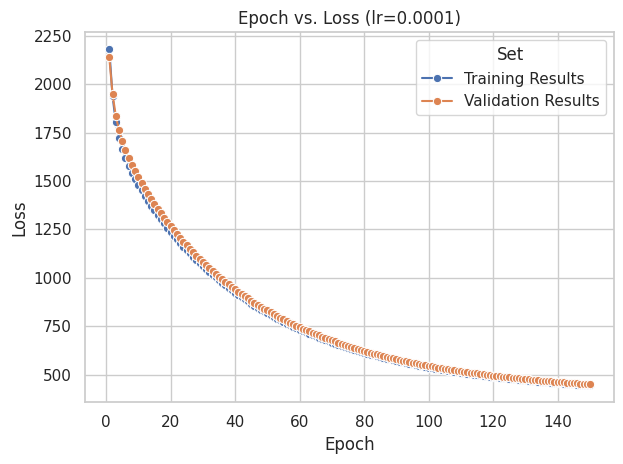

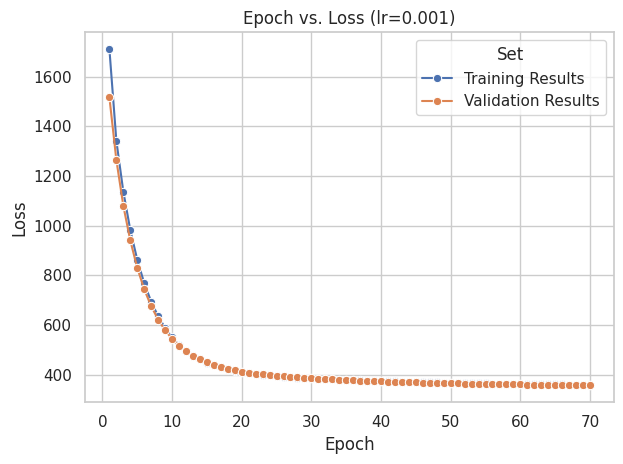

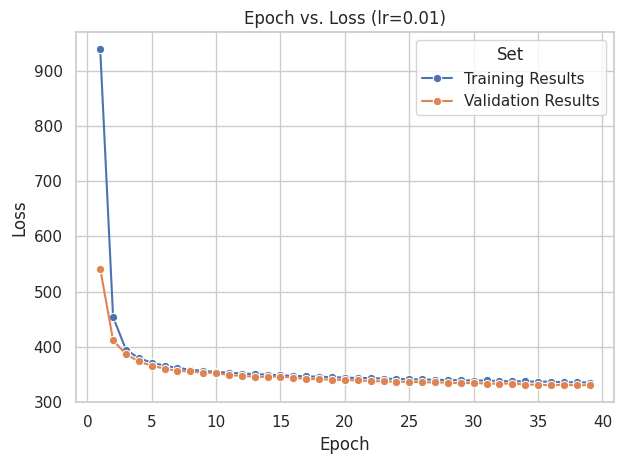

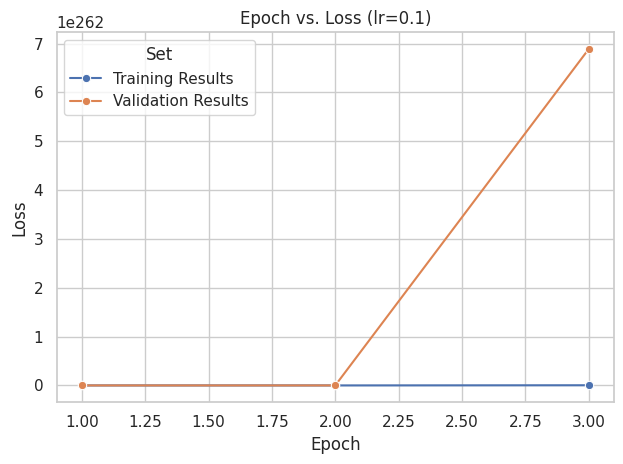

In [ ]:
## TODO: Visualize the results. What do you see and why?
for lr, curves in early_stop_histories.items():
    plot_losses(curves['train_losses'], curves['val_losses'], lr=lr)


lr=0.01, tol=0.0, N=5
Stopping early after 78 epochs with best validation loss: 320.22537232079685.
lr=0.001, tol=0.0, N=5
Stopping early after 984 epochs with best validation loss: 316.48359641450685.
lr=0.0001, tol=1.0, N=5
Stopping early after 279 epochs with best validation loss: 390.47074290222395.
lr=0.0001, tol=2.0, N=5
Stopping early after 217 epochs with best validation loss: 408.41840248382437.
lr=0.0001, tol=0.0, N=10
lr=0.0001, tol=1.0, N=15
Stopping early after 496 epochs with best validation loss: 367.2311665020181.
lr=0.0001, tol=2.0, N=20
Stopping early after 413 epochs with best validation loss: 374.4579783576598.
→ lr=0.01, tol=0.0, N=5 ran for 78 epochs


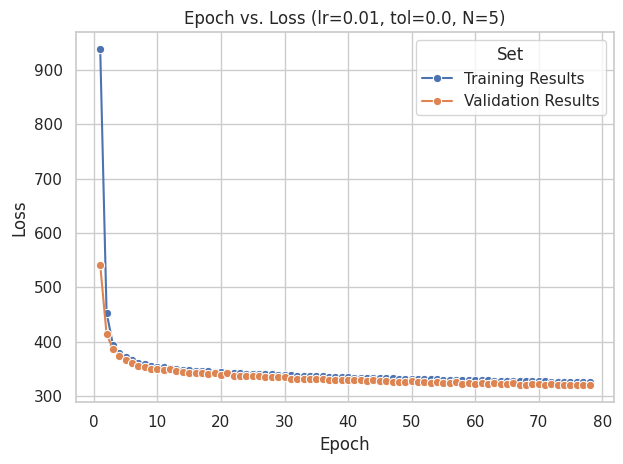

→ lr=0.001, tol=0.0, N=5 ran for 984 epochs


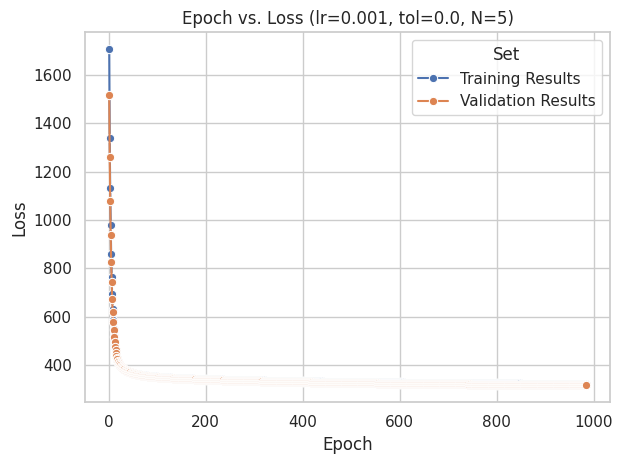

→ lr=0.0001, tol=1.0, N=5 ran for 279 epochs


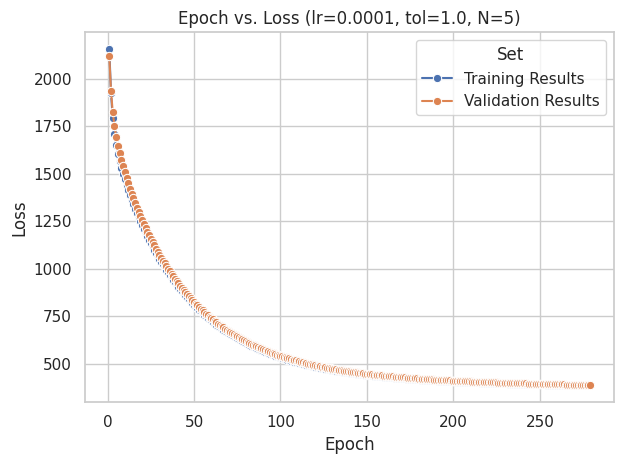

→ lr=0.0001, tol=2.0, N=5 ran for 217 epochs


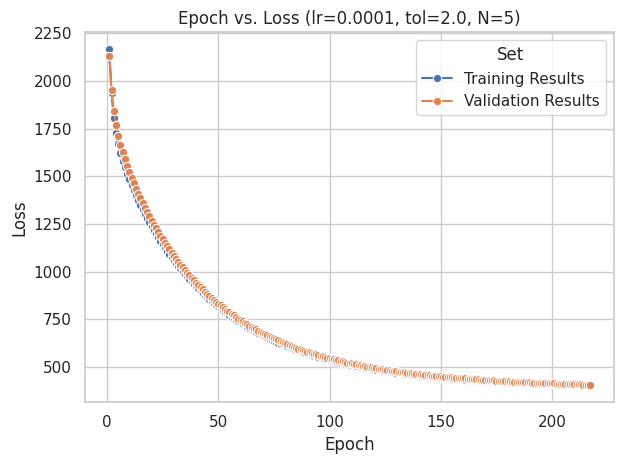

→ lr=0.0001, tol=0.0, N=10 ran for 9999 epochs


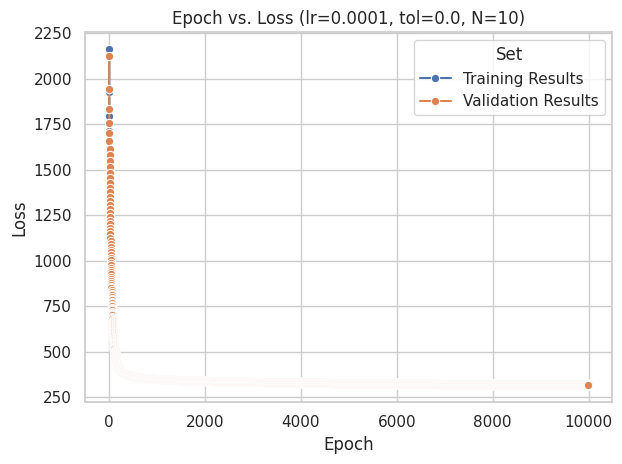

→ lr=0.0001, tol=1.0, N=15 ran for 496 epochs


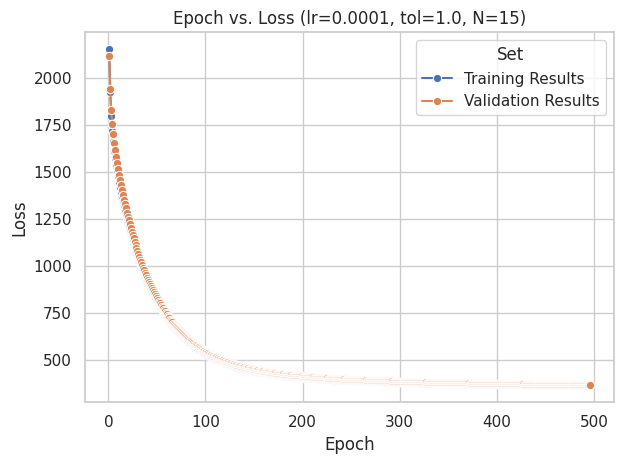

→ lr=0.0001, tol=2.0, N=20 ran for 413 epochs


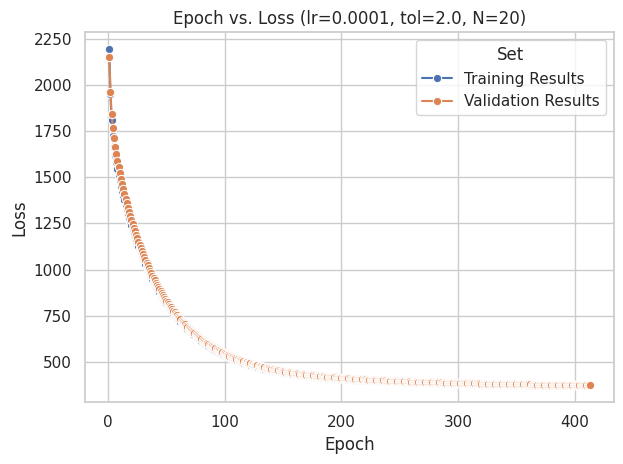

In [ ]:
es_varied = [
    {'lr': 0.01, 'tol': 0.0, 'N': 5, 'num_epochs':9999},
    {'lr': 0.001, 'tol': 0.0, 'N': 5, 'num_epochs':9999},
    {'lr': 0.0001, 'tol': 1.0, 'N': 5, 'num_epochs':9999},
    {'lr': 0.0001, 'tol': 2.0, 'N': 5, 'num_epochs':9999},
    {'lr': 0.0001, 'tol': 0.0, 'N': 10, 'num_epochs':9999},
    {'lr': 0.0001, 'tol': 1.0, 'N': 15, 'num_epochs':9999},
    {'lr': 0.0001, 'tol': 2.0, 'N': 20, 'num_epochs':9999},

]

es_results = {} # maps (lr, tol, N) → {'train': [...], 'val': [...]}

for params in es_varied:
    lr, tol, N = params['lr'], params['tol'], params['N']
    print(f"lr={lr}, tol={tol}, N={N}")
    # fresh model per params
    m = LinearRegression(input_dim, output_dim).to(device)
    train_hist, val_hist = run_training_early_stopper(
        m,
        train_dataloader,
        val_dataloader,
        loss_function,
        device,
        num_epochs=params.get('num_epochs', num_epochs),
        lr=lr,
        tol=tol,
        N=N,
        verbose=False
    )
    es_results[(lr, tol, N)] = {
        'train': train_hist,
        'val':   val_hist
    }

for (lr, tol, N), curves in es_results.items():
    epochs_ran = len(curves['train'])
    print(f"→ lr={lr}, tol={tol}, N={N} ran for {epochs_ran} epochs")
    plot_losses(curves['train'], curves['val'], lr=f"{lr}, tol={tol}, N={N}")

**Question**:
* Can tol=0? Why?

Runs with tol = 0 did stop on 78 epochs at lr = 0.01, 984 epochs at lr = 0.001. They halted when the validation loss stopped changing at all for the configured patience window. Yes, tol = 0 is allowed, early stopping still fires once the loss plateaus to identical float values. It just tends to take longer.
* How many epochs it would really run? Try to change the lr=0.001 and lr=0.0001 and see when this would stop.

Larger **Lr** converges in far fewer epochs, shrinking LR by 10× can turn tens of epochs into hundreds, which we see with lr = 0.0001 which used all the 9999 epochs we defined.
* What happens if you increase the tolerance?

With lr = 0.0001, N = 5:  tol = 1 to 279 epochs, best = 390  tol = 2 to 217 epochs, best = 408, Bigger tol results in lesser epochs since we do not improve that much in the last epochs but also results in **higher final loss**.
* What if you increase N?

in this case we can explore more because we can tolerate more epochs with no better loss(based on the tolerance). This results with **lower final loss** but **more epochs overally**.

## Now lets try to explore the impact of the batch size

**Task:** Fix $num\_epochs = 150$ and $lr = 0.001$ and try to change the batch size using values $[2, 4, 32, 128, 1024]$ for the batch size.
* What impact the batch size have? Why?

In [45]:
N = 5
tol = 2

num_epochs = 150
lr = 0.001

## TODO: Train with different batch sizes

batch_sizes = [2, 4, 32, 128, 1024]
batch_size_histories = {}

for size in batch_sizes:
    train_dataloader = DataLoader(conductor_train, batch_size=size, shuffle=True)
    val_dataloader = DataLoader(conductor_val, batch_size=size, shuffle=True)
    test_dataloader = DataLoader(conductor_test, batch_size=size, shuffle=True)

    # fresh model per batch_size
    model_es = LinearRegression(input_dim, output_dim).to(device)
    print(f"lr={lr}, tol={tol}, N={N}")
    # run training
    tr_losses, va_losses = run_training_early_stopper(
        model_es,
        train_dataloader,
        val_dataloader,
        loss_function,
        device,
        num_epochs=num_epochs,
        lr=lr,
        tol=tol,
        N=N,
        verbose=False
    )

    batch_size_histories[size] = {
        'train_losses': tr_losses,
        'val_losses':   va_losses
    }



lr=0.001, tol=2, N=5


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Stopping early after 16 epochs with best validation loss: 314.5860984054558.
lr=0.001, tol=2, N=5
Stopping early after 18 epochs with best validation loss: 320.01810537764345.
lr=0.001, tol=2, N=5
Stopping early after 35 epochs with best validation loss: 336.51785174005704.
lr=0.001, tol=2, N=5
Stopping early after 48 epochs with best validation loss: 352.35827369166805.
lr=0.001, tol=2, N=5
Stopping early after 124 epochs with best validation loss: 386.444020089801.


{2: {'train_losses': [429.22409378500873, 356.78268982441887, 349.1228284669566, 344.03942556928894, 341.1324539949699, 337.37487319604946, 336.87825323600117, 334.8018066871357, 333.08323718664866, 332.08177068457394, 330.179789757795, 329.61142589458655, 329.51344360838596, 328.24310753238746, 327.8933525040405, 326.657971919028], 'val_losses': [359.1806423813117, 348.1035690600219, 342.3472830395722, 332.7041077842247, 334.7947205079206, 332.8041328679704, 317.93832231270756, 321.8799104548763, 317.5392246170547, 324.409845632647, 314.5860984054558, 319.6929209288629, 321.36191981386486, 315.8182392369018, 314.305691060389, 325.07606118545226]}, 4: {'train_losses': [482.46753119653226, 360.4444525507425, 352.0846072613666, 347.49667847075193, 344.17795343242295, 340.8739915140306, 338.69770935200637, 337.7065640369435, 335.4643533708266, 334.39954799948055, 333.0330746974373, 331.91077488261067, 330.84223842024426, 330.22789060208504, 329.16952859875244, 327.6739572537152, 327.50668

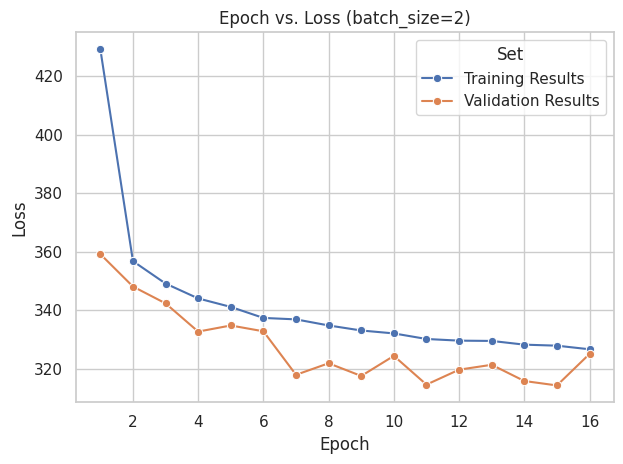

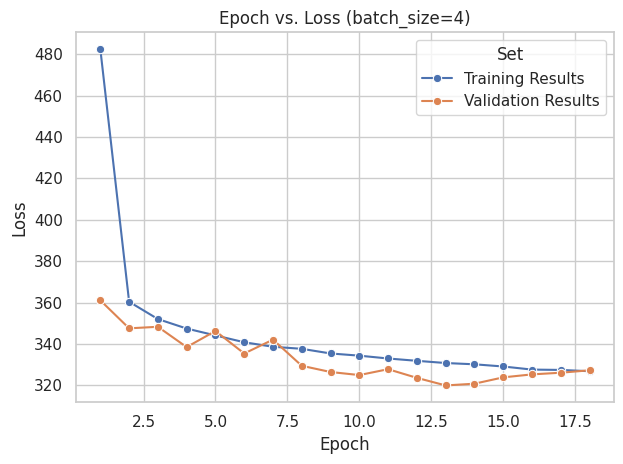

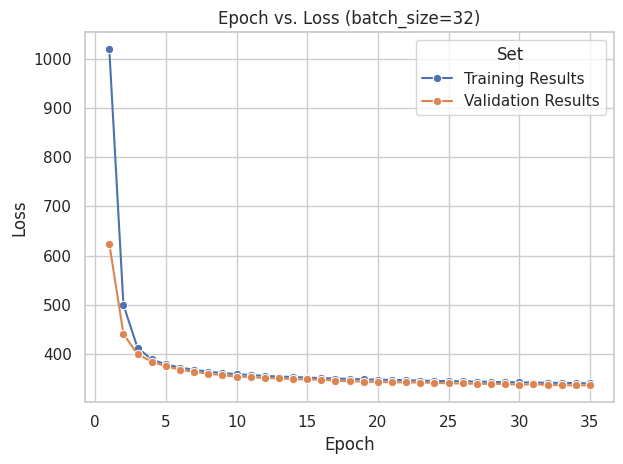

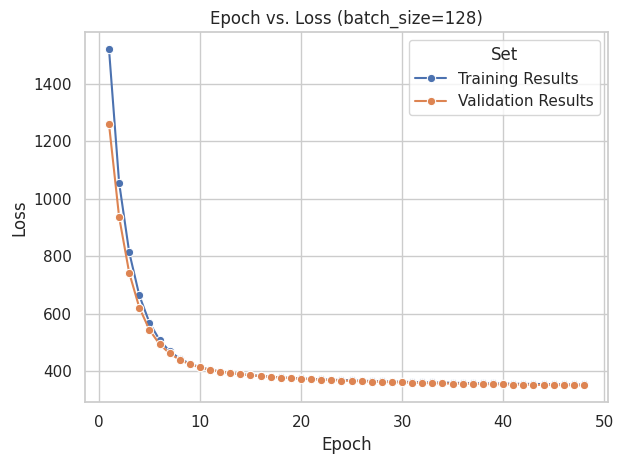

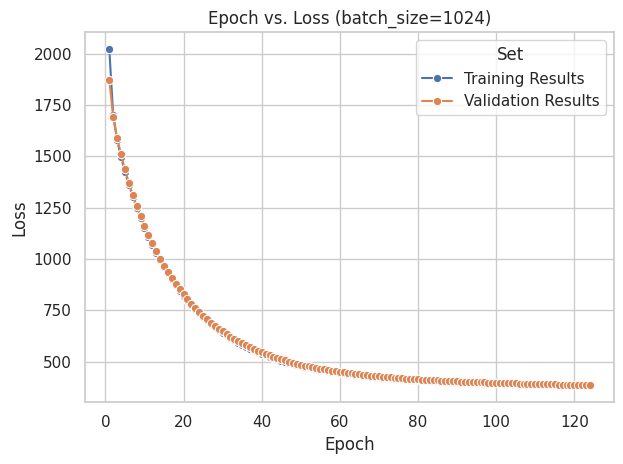

In [46]:
## TODO: Visualize the differences
print(batch_size_histories)
for batch_size, curves in batch_size_histories.items():
    plot_losses(curves['train_losses'], curves['val_losses'], batch_size=batch_size)


#### What we observe and why
- in lower batches (2 or 4) we start with low loss already in the first few epochs and continue to decrease it over epochs. But every epoch also takes more time since we are feeding rouhgly small fraction of the data in each batch. the validation loss also fluctuate over epochs meaning that we may overfit. The number of epochs(16 and 18) to stop early is low because of this fact. Since the loss is fluctating in this approach we may increase the number of N to tolerate some higher val loss in order to get minimum validation loss

- For larger batches (32,128 and 1024) we have a higher starting loss and continue to decrease it through first few epochs (the lower the batch size the sooner we reach plateu in epochs). Every epoch takes less time since we update the parameters over one batch and we have lesser batches here. the validation loss is more smooth due to the fact that we do not update our parameters over 2 or 4 points of the data, but really a mini-batch of the data resulting to converge to the global minimim slow but steady. we have more number of epochs(35,48,124) since we update less often in each epoch. Since we are having a good guess about the global minimum we may increase the learning rate in this approach to converge to the minimum faster.

Take home message:
- low batch size converge faster but it is unstable on the batch size. we may use higher tolerance or N to compensate for that.
- bigger batch size is converging slowly but surely. we may use higher learning rate to converge faster in this approach.